# Credit Card Fraud Detection 

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

## Get the Data

In [5]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [6]:
credit_card_data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
credit_card_data = credit_card_data.drop("Time", axis=1)

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [14]:
#standard scaling
credit_card_data['std_Amount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape (-1,1))

#removing Amount
credit_card_data = credit_card_data.drop("Amount", axis=1)

<Axes: xlabel='Class', ylabel='count'>

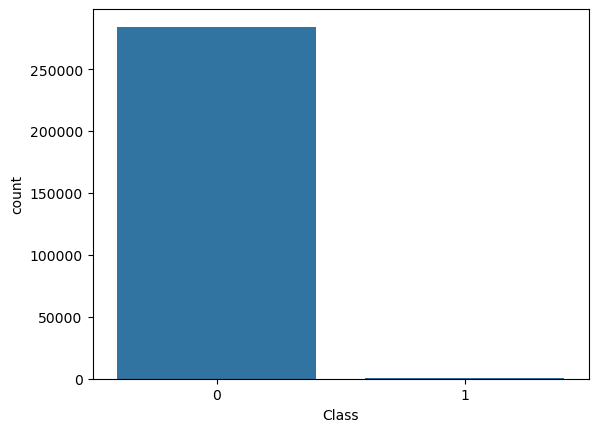

In [15]:
sns.countplot(x="Class", data=credit_card_data)

In [16]:
import imblearn 
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [17]:
# Prepare features (X) and target (Y)
# Extract all columns except the 'Class' column (features)
X = credit_card_data.drop(columns=['Class'])  # Remove the 'Class' column for features

# The target column is 'Class'
Y = credit_card_data['Class']

# Apply undersampling: reduce the number of legitimate transactions to match 50% of fraudulent transactions
X_under, Y_under = undersample.fit_resample(X, Y)

D:\Anaconda\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [18]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

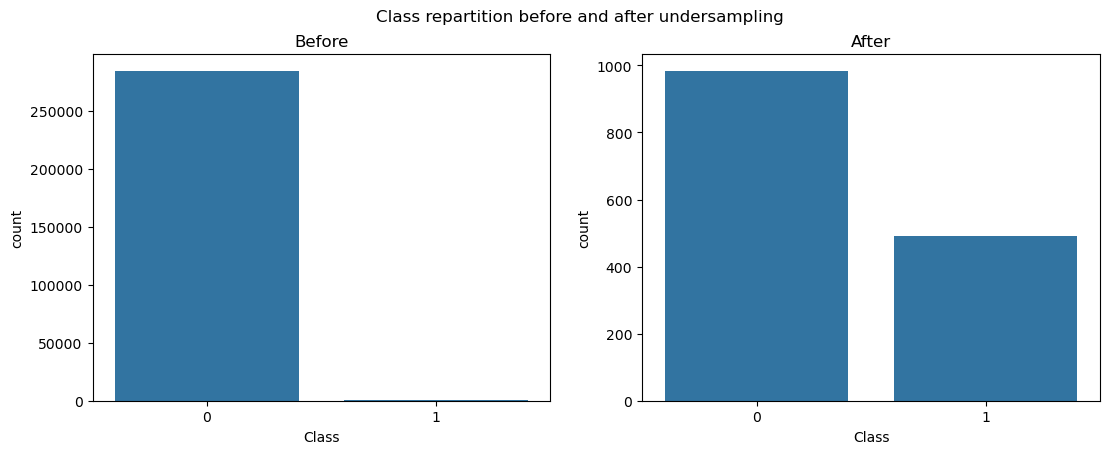

In [19]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit_card_data, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [22]:
# Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# SVM Model (with probability=True to get predicted probabilities)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [25]:
# Predictions from all models
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Prediction probabilities (for ROC AUC)
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation function for a model
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"{model_name} Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"{model_name} Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"{model_name} F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("\n")


In [27]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "SVM")

Logistic Regression Accuracy: 0.9459
Logistic Regression Precision: 0.9600
Logistic Regression Recall: 0.8889
Logistic Regression F1 Score: 0.9231


Random Forest Accuracy: 0.9493
Random Forest Precision: 0.9794
Random Forest Recall: 0.8796
Random Forest F1 Score: 0.9268


SVM Accuracy: 0.9426
SVM Precision: 0.9789
SVM Recall: 0.8611
SVM F1 Score: 0.9163




In [28]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_log_reg_df = pd.DataFrame(cm_log_reg, index=['Not Fraud', 'Fraud'], columns=['Not Fraud', 'Fraud'])
print("Confusion Matrix for Logistic Regression:")
print(cm_log_reg_df)
print("\n")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_df = pd.DataFrame(cm_rf, index=['Not Fraud', 'Fraud'], columns=['Not Fraud', 'Fraud'])
print("Confusion Matrix for Random Forest:")
print(cm_rf_df)
print("\n")

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm_df = pd.DataFrame(cm_svm, index=['Not Fraud', 'Fraud'], columns=['Not Fraud', 'Fraud'])
print("Confusion Matrix for SVM:")
print(cm_svm_df)
print("\n")

Confusion Matrix for Logistic Regression:
           Not Fraud  Fraud
Not Fraud        184      4
Fraud             12     96


Confusion Matrix for Random Forest:
           Not Fraud  Fraud
Not Fraud        186      2
Fraud             13     95


Confusion Matrix for SVM:
           Not Fraud  Fraud
Not Fraud        186      2
Fraud             15     93




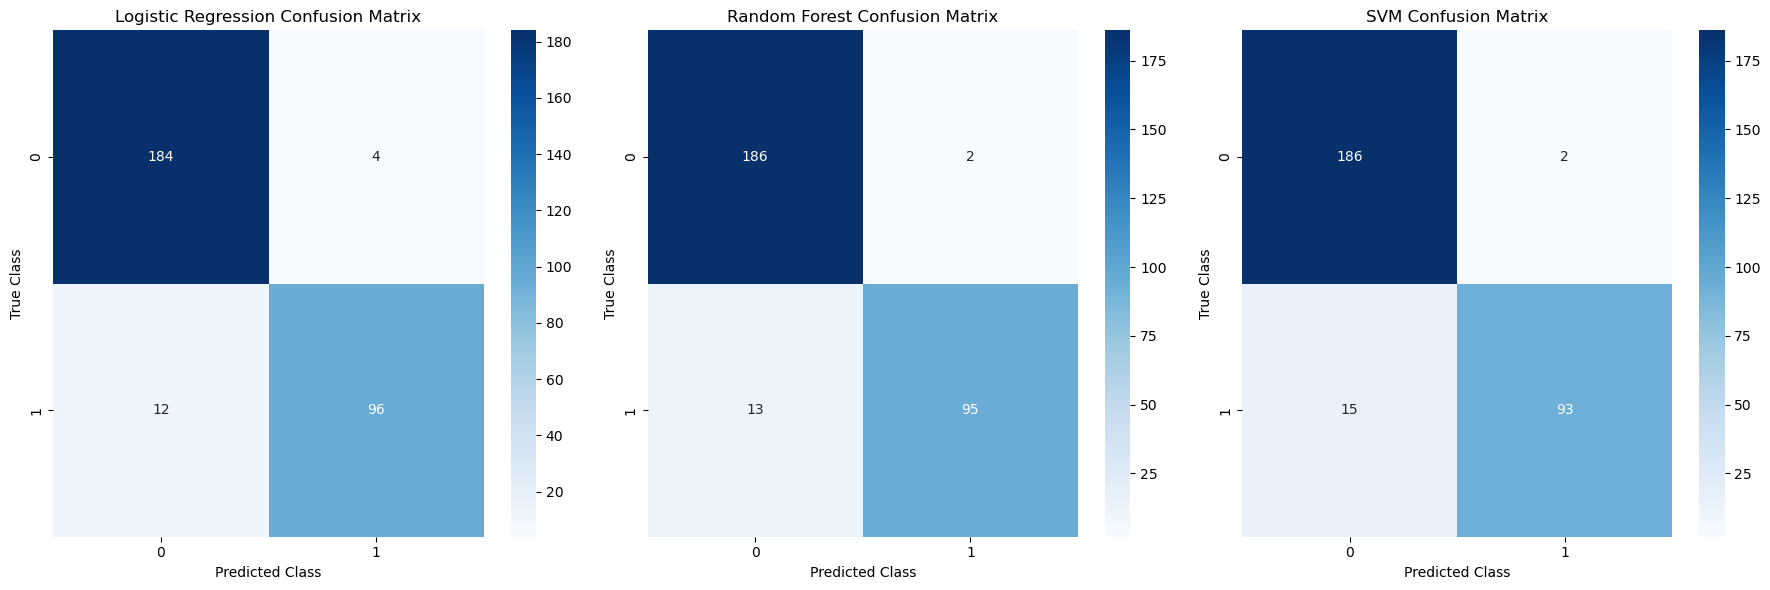

In [29]:
# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')

# Plot Confusion Matrices for all models
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression", axs[0])
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest", axs[1])
plot_confusion_matrix(y_test, y_pred_svm, "SVM", axs[2])

plt.tight_layout()
plt.show()

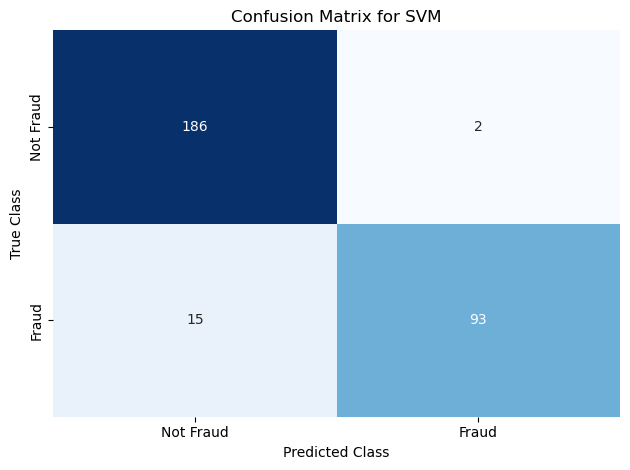

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['Not Fraud', 'Fraud'], columns=['Not Fraud', 'Fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix for SVM")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()


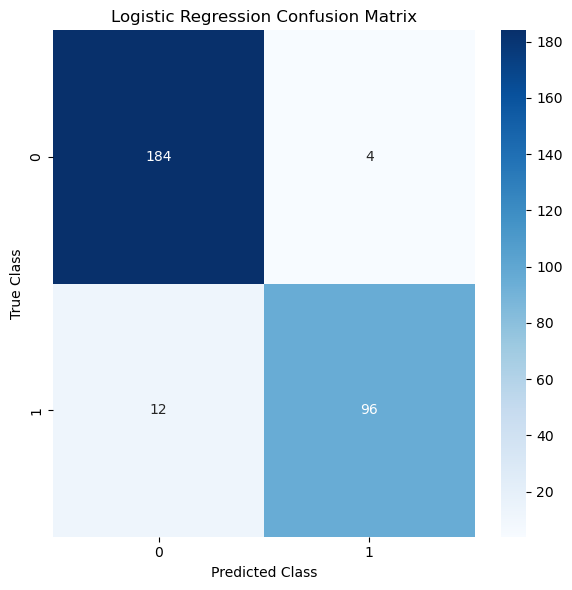

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')

# Plotting Confusion Matrix for Logistic Regression
fig, ax = plt.subplots(figsize=(6, 6))  # Single plot
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression", ax)
plt.tight_layout()
plt.show()


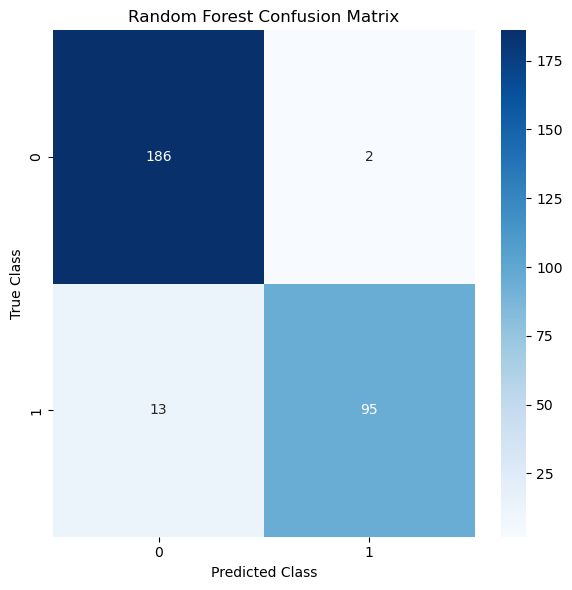

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')

# Plotting Confusion Matrix for Random Forest
fig, ax = plt.subplots(figsize=(6, 6))  # Single plot
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest", ax)
plt.tight_layout()
plt.show()
